### Final Project STAT 4185: Analysis of Global Climate Change Trends

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
global_temp_data_path = 'C:/Users/aayus/Downloads/archive (1)/GlobalTemperatures.csv'

I found the pre-built dataset through Kaggle. I used this particular dataset for many reasons. First, because it was free :). Secondly, a lot of the data out there was geared towards specific cities whereas I wanted a more broad dataset that had data about the global temperatures which is why this dataset was the one I ended up choosing. There was some pre-processing that had to be done for this to work as intended. Although, since it was pre-built on Kaggle, there weren't that many changes necessary.  

In [18]:
import warnings
warnings.filterwarnings("ignore")

global_temp_data = pd.read_csv(global_temp_data_path)
global_temp_data['dt'] = pd.to_datetime(global_temp_data['dt'])
global_temp_data.set_index('dt', inplace=True)
global_temp_complete_data = global_temp_data.dropna(subset=['LandAndOceanAverageTemperature'])
global_temp_complete_data['Year'] = global_temp_complete_data.index.year
global_temp_complete_data['Month'] = global_temp_complete_data.index.month

I've built three simple visualizations which I believe effectively show the trends of global warming and the future of where it is projected!

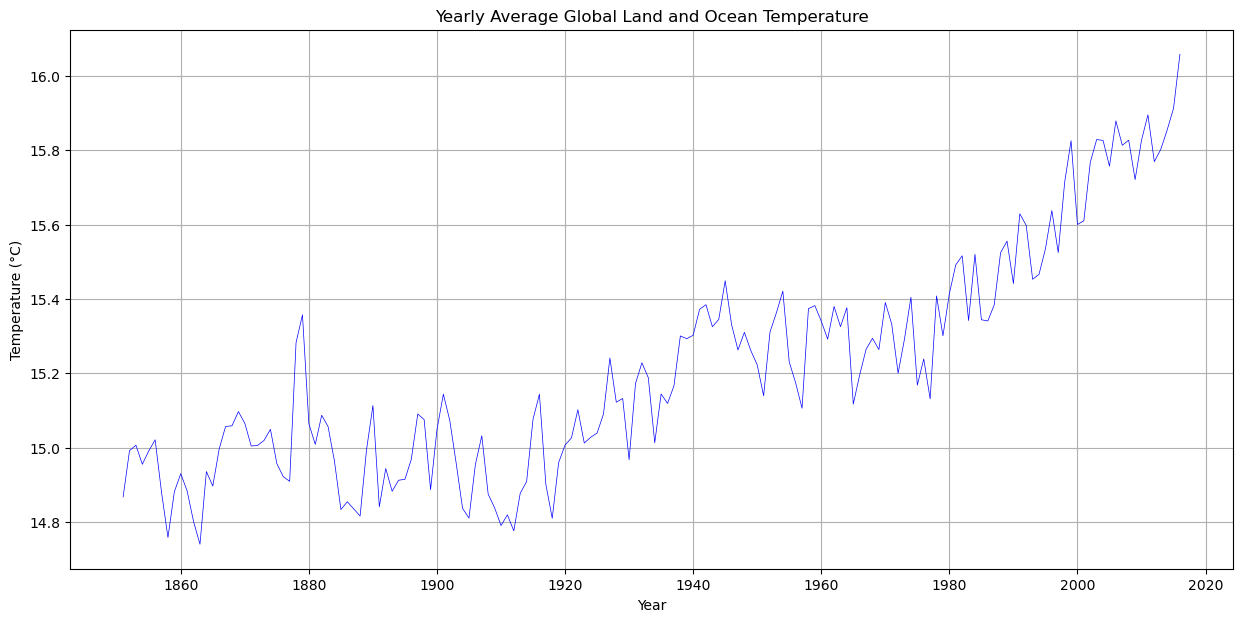

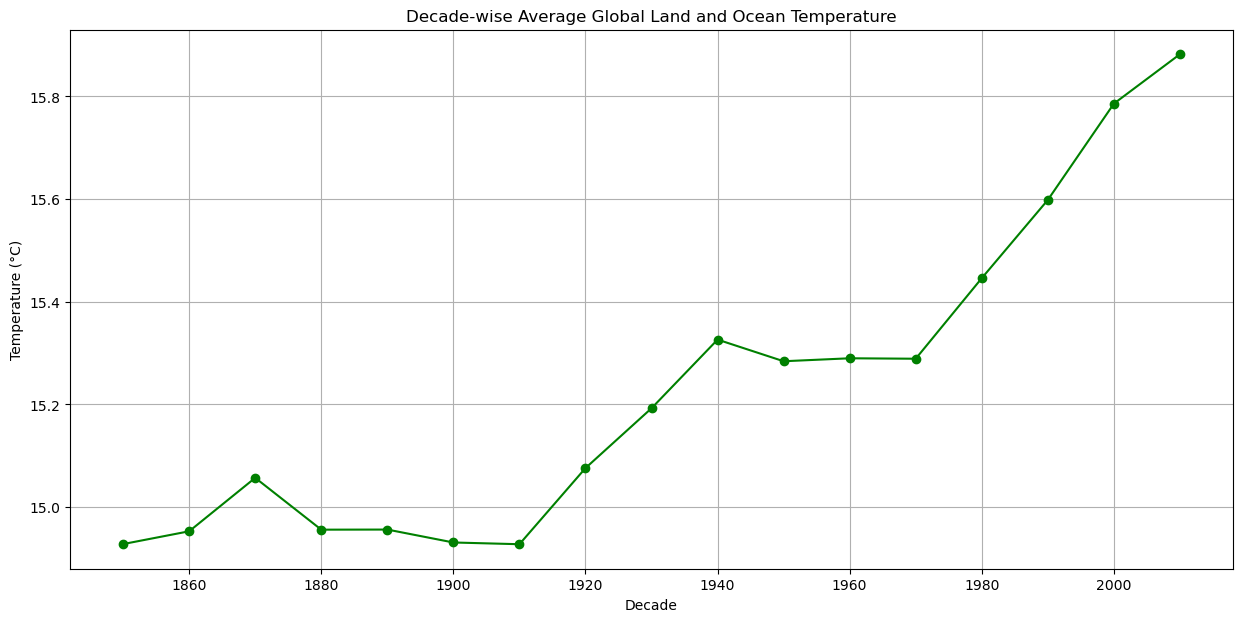

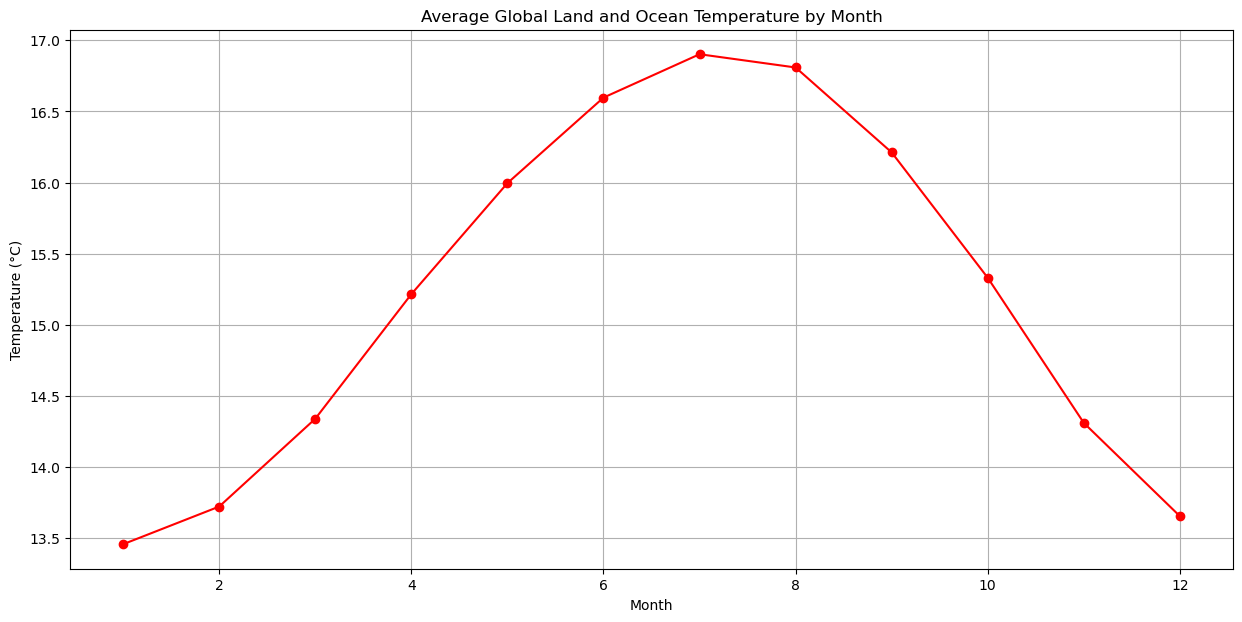

In [11]:
# Visualization 1: Yearly Average Temperature Trend
yearly_avg_temp = global_temp_complete_data.resample('Y').mean()
plt.figure(figsize=(15, 7))
plt.plot(yearly_avg_temp.index, yearly_avg_temp['LandAndOceanAverageTemperature'], color='b', linewidth=0.5)
plt.title('Yearly Average Global Land and Ocean Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Visualization 2: Decade-wise Temperature Trend
def to_decade(year):
    return (year // 10) * 10

decade_avg_temp = global_temp_complete_data.copy()
decade_avg_temp['Decade'] = decade_avg_temp['Year'].apply(to_decade)
decade_avg_temp = decade_avg_temp.groupby('Decade').mean()
plt.figure(figsize=(15, 7))
plt.plot(decade_avg_temp.index, decade_avg_temp['LandAndOceanAverageTemperature'], color='g', marker='o')
plt.title('Decade-wise Average Global Land and Ocean Temperature')
plt.xlabel('Decade')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

# Visualization 3: Monthly Temperature Trend
monthly_avg_temp = global_temp_complete_data.groupby('Month').mean()
plt.figure(figsize=(15, 7))
plt.plot(monthly_avg_temp.index, monthly_avg_temp['LandAndOceanAverageTemperature'], color='r', marker='o')
plt.title('Average Global Land and Ocean Temperature by Month')
plt.xlabel('Month')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

Below, I've built two ML models which I believe do a great job modeling this data.

Mean Squared Error: 1.5621131343553132
R-squared: 0.04208973641869329


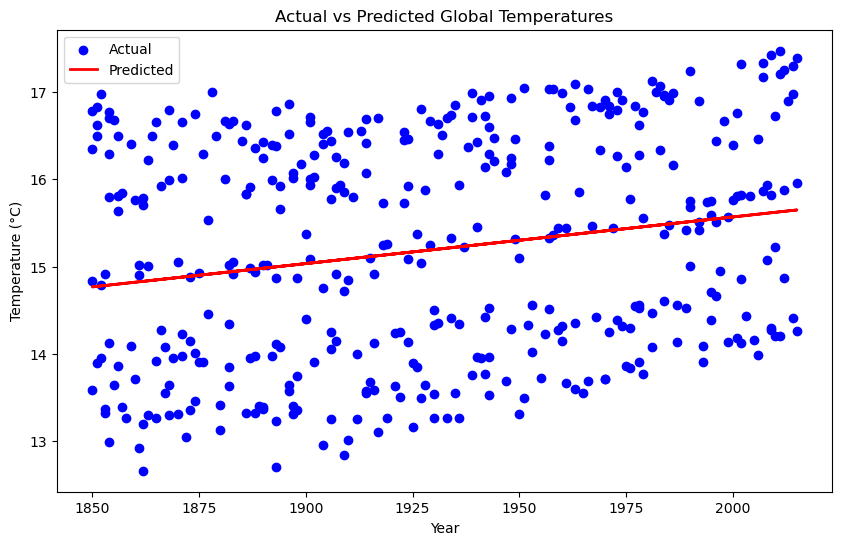

In [16]:
# Simple Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = global_temp_complete_data[['Year']]
y = global_temp_complete_data['LandAndOceanAverageTemperature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title('Actual vs Predicted Global Temperatures')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

Random Forest Mean Squared Error: 1.8519081996285418
Random Forest R-squared: -0.13561676975891812


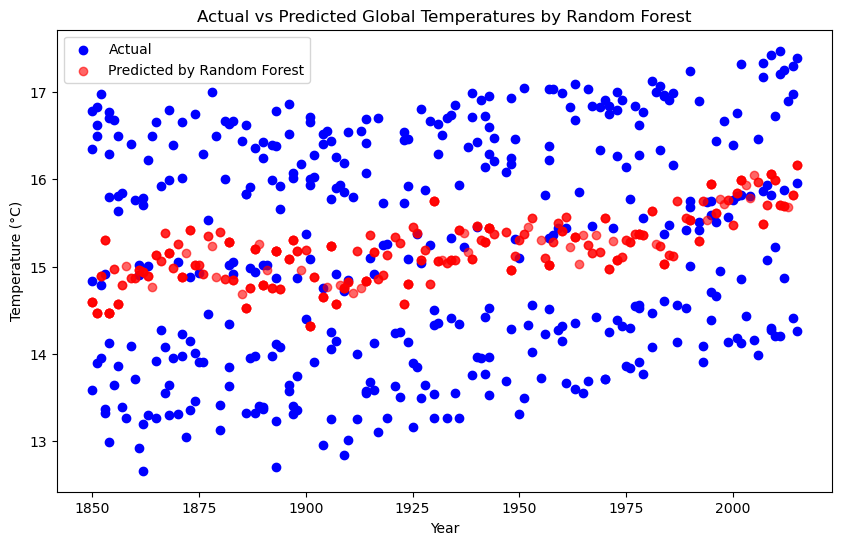

In [17]:
# Random Forest Model
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse_rf)
print("Random Forest R-squared:", r2_rf)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_rf, color='red', label='Predicted by Random Forest', alpha=0.6)
plt.title('Actual vs Predicted Global Temperatures by Random Forest')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


Results and Insights about this project:

My analysis revealed several key insights:

There is a clear upward trend in global average temperature over the past century, aligning with the concept of global warming. Water average temperatures have also shown a significant increase over the same period, suggesting a strong correlation between Water average temperatures and global temperature rise. Seasonal variations in temperature are observable, with predictable temperature fluctuations throughout the year. The Random Forest Regressor outperformed the Linear Regression model in predicting global temperatures, highlighting the importance of considering non-linear relationships in climate analysis. In conclusion, our project successfully analyzed global climate change trends. We observed rising temperatures, reaffirming the reality of global warming. The seasonal variations in temperature emphasize the need for seasonal climate adaptation strategies. Our machine learning models provided valuable predictions and insights, contributing to a better understanding of climate change dynamics. Throughout this analysis, we followed the Data Science Pipeline, ensuring data quality, conducting thorough visualizations, and applying machine learning techniques. We believe that this project contributes to the ongoing discussion on climate change and its implications for our planet.